<a href="https://colab.research.google.com/github/eildes06/Forecasting/blob/main/timeseries_arimasarima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gerekli kutuphaneler yuklendi.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import itertools
import statsmodels.api as sm
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dtf = pd.read_excel('/content/drive/MyDrive/Data/Veri-Seti.xlsx',
                 index_col='Date',
                 parse_dates=True
                )

In [ ]:


dtf.head()# ilk 5 gorunumu

,Otomotiv Satis,OTV Orani,Faiz,EUR/TL,Kredi Stok
Date,,,,,
2010-01-01,20095.000,37.000,13.182,2.107,341244.126
2010-02-01,31172.000,37.000,13.273,2.074,351940.949
2010-03-01,51769.000,37.000,12.727,2.086,361307.320
2010-04-01,54946.000,37.000,12.012,2.009,373575.340
2010-05-01,59377.000,37.000,11.740,1.949,387708.051


In [ ]:
dtf.tail()# son 5 gorunumu (None degerler var )

,Otomotiv Satis,OTV Orani,Faiz,EUR/TL,Kredi Stok
Date,,,,,
2023-02-01,NaN,NaN,NaN,NaN,NaN
2023-03-01,NaN,NaN,NaN,NaN,NaN
2023-04-01,NaN,NaN,NaN,NaN,NaN
2023-05-01,NaN,NaN,NaN,NaN,NaN
2023-06-01,NaN,NaN,NaN,NaN,NaN


In [ ]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 162 entries, 2010-01-01 to 2023-06-01
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Otomotiv Satis  149 non-null    float64
 1   OTV Orani       149 non-null    float64
 2   Faiz            149 non-null    float64
 3   EUR/TL          149 non-null    float64
 4   Kredi Stok      149 non-null    float64
dtypes: float64(5)
memory usage: 7.6 KB


In [ ]:
dtf.dropna(inplace=True)# none degerler dusuruldu

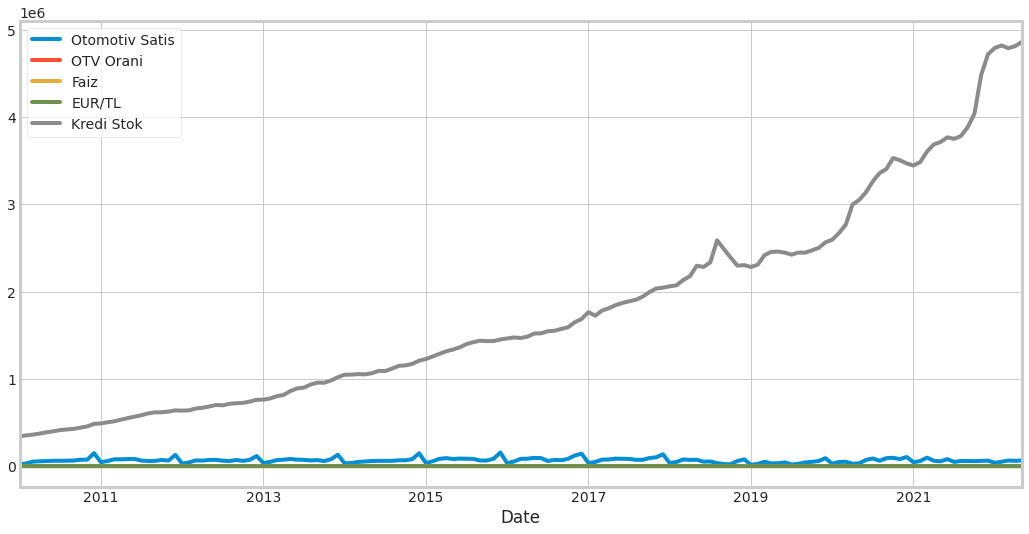

In [ ]:
dtf.plot(figsize=(16,8));

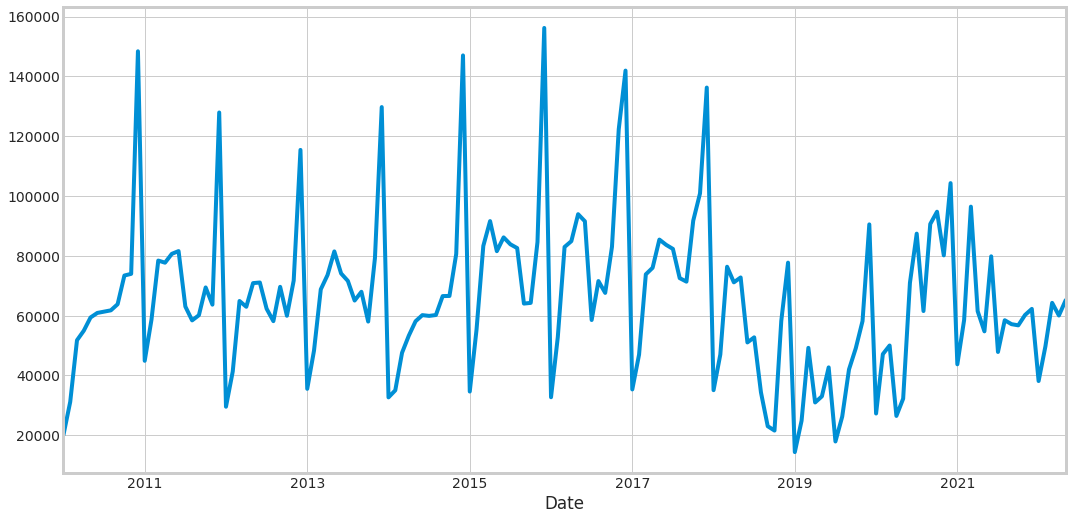

In [ ]:
dtf["Otomotiv Satis"].plot(figsize=(16,8));

In [ ]:
! pip install statsmodels==0.12.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
fig = px.line(dtf, x=dtf.index, y='Otomotiv Satis', title='Otomotiv Satis Sayisi')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
# AR example
from statsmodels.tsa.ar_model import AutoReg
# fit model

model = AutoReg(dtf["Otomotiv Satis"], lags=12)
model_fit = model.fit()
# make prediction
pred = model_fit.predict(len(dtf),len(dtf)+len(dtf)-1,dynamic=False)
print(pred)

2022-06-01   73483.936
2022-07-01   53554.926
2022-08-01   61535.656
2022-09-01   63684.537
2022-10-01   63361.366
                ...   
2034-06-01   63913.000
2034-07-01   63954.510
2034-08-01   64056.593
2034-09-01   63820.151
2034-10-01   63129.711
Freq: MS, Length: 149, dtype: float64


# Sarimax

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(dtf["Otomotiv Satis"],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3728.8662995972873
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3337.468320226244
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3108.95663945858
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2824.8802700208853
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3128.411030468027
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3103.8130047532995
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2850.8792872899467
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2825.6577490393115
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3626.50497359397
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3291.732191687105
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3033.8473617755103
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2753.826408076939
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3324.540171939641
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3277.053458860539
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2805.229858277102
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2755.769616049999
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3471.504370841685
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3109.246219371296
ARIMA(

In [ ]:
mod = sm.tsa.statespace.SARIMAX(dtf["Otomotiv Satis"],
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3241      0.210      1.544      0.122      -0.087       0.735
ma.L1         -0.6930      0.150     -4.617      0.000      -0.987      -0.399
ma.S.L12      -0.4859      0.081     -5.985      0.000      -0.645      -0.327
sigma2      2.512e+08   1.62e-10   1.55e+18      0.000    2.51e+08    2.51e+08


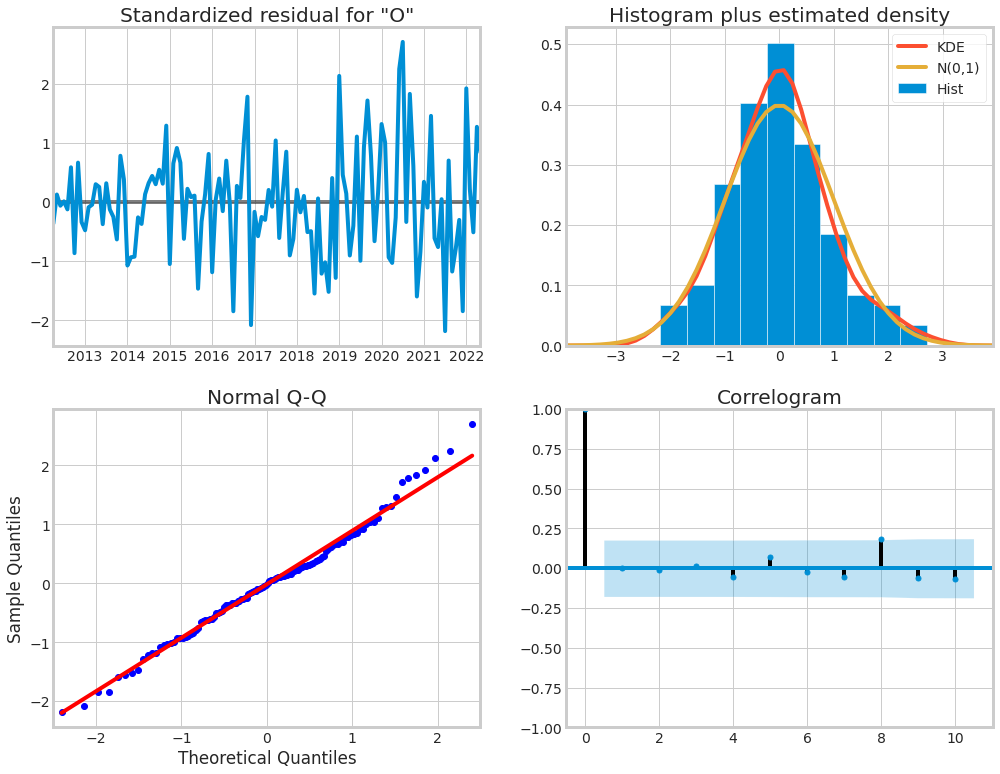

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2022-01-01'), dynamic=False)
pred_ci = pred.conf_int()

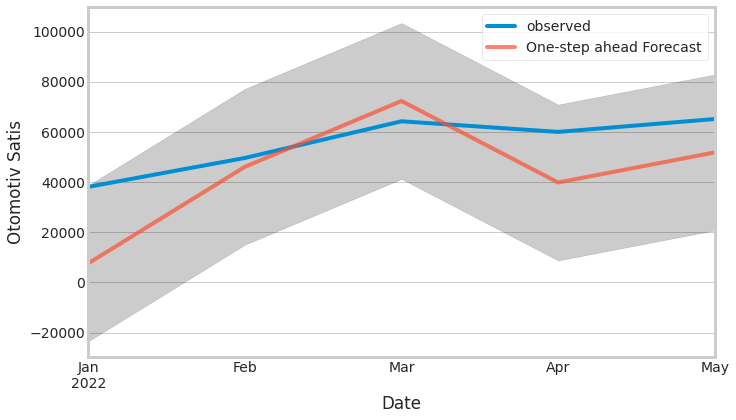

In [ ]:
ax = dtf["Otomotiv Satis"]['2022':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Otomotiv Satis')
plt.legend()

plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = dtf["Otomotiv Satis"]['2022-05-01':]


mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 177188738.48


In [ ]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2022-06-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

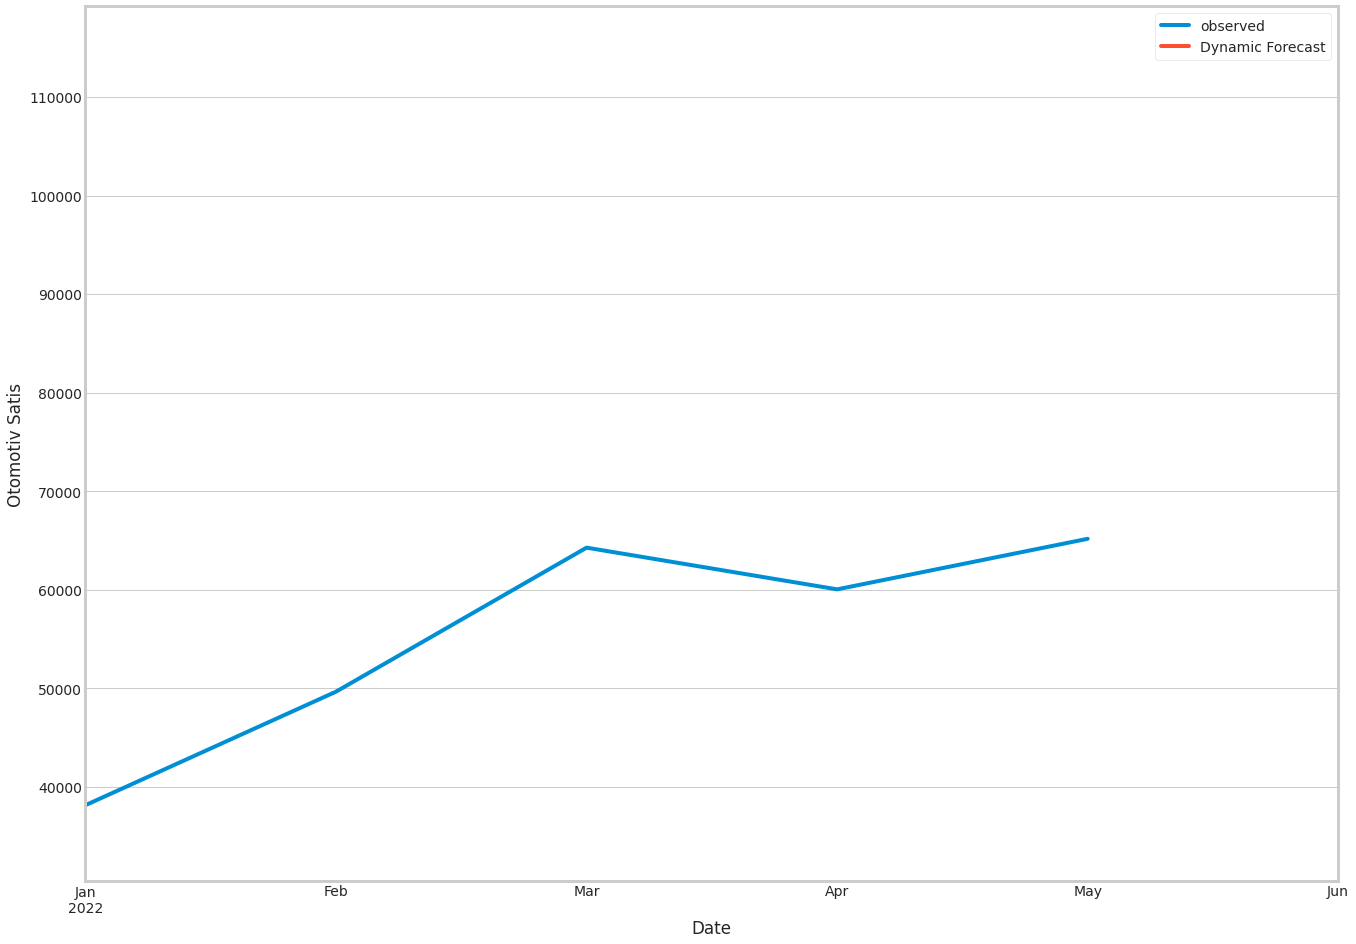

In [ ]:
ax = dtf["Otomotiv Satis"]['2022':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2022-05-01'), dtf["Otomotiv Satis"].index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Otomotiv Satis')

plt.legend()
plt.show()

In [ ]:

pred_uc = results.get_forecast(steps=13)


pred_ci = pred_uc.conf_int()

In [ ]:
pred_ci 

,lower Otomotiv Satis,upper Otomotiv Satis
2022-06-01,49380.547,111502.540
2022-07-01,25631.445,99088.199
2022-08-01,20387.256,100421.259
2022-09-01,25190.974,110442.420
2022-10-01,25161.095,115077.530
2022-11-01,25394.184,119668.946
2022-12-01,37606.364,136023.129
2023-01-01,-9175.396,93208.632
2023-02-01,2288.032,108488.941
2023-03-01,20779.786,130664.359


In [ ]:
pred_uc

In [ ]:
pred_uc.predicted_mean

2022-06-01   80441.544
2022-07-01   62359.822
2022-08-01   60404.258
2022-09-01   67816.697
2022-10-01   70119.312
2022-11-01   72531.565
2022-12-01   86814.747
2023-01-01   42016.618
2023-02-01   55388.487
2023-03-01   75722.073
2023-04-01   60816.720
2023-05-01   62813.527
2023-06-01   81554.809
Freq: MS, Name: predicted_mean, dtype: float64

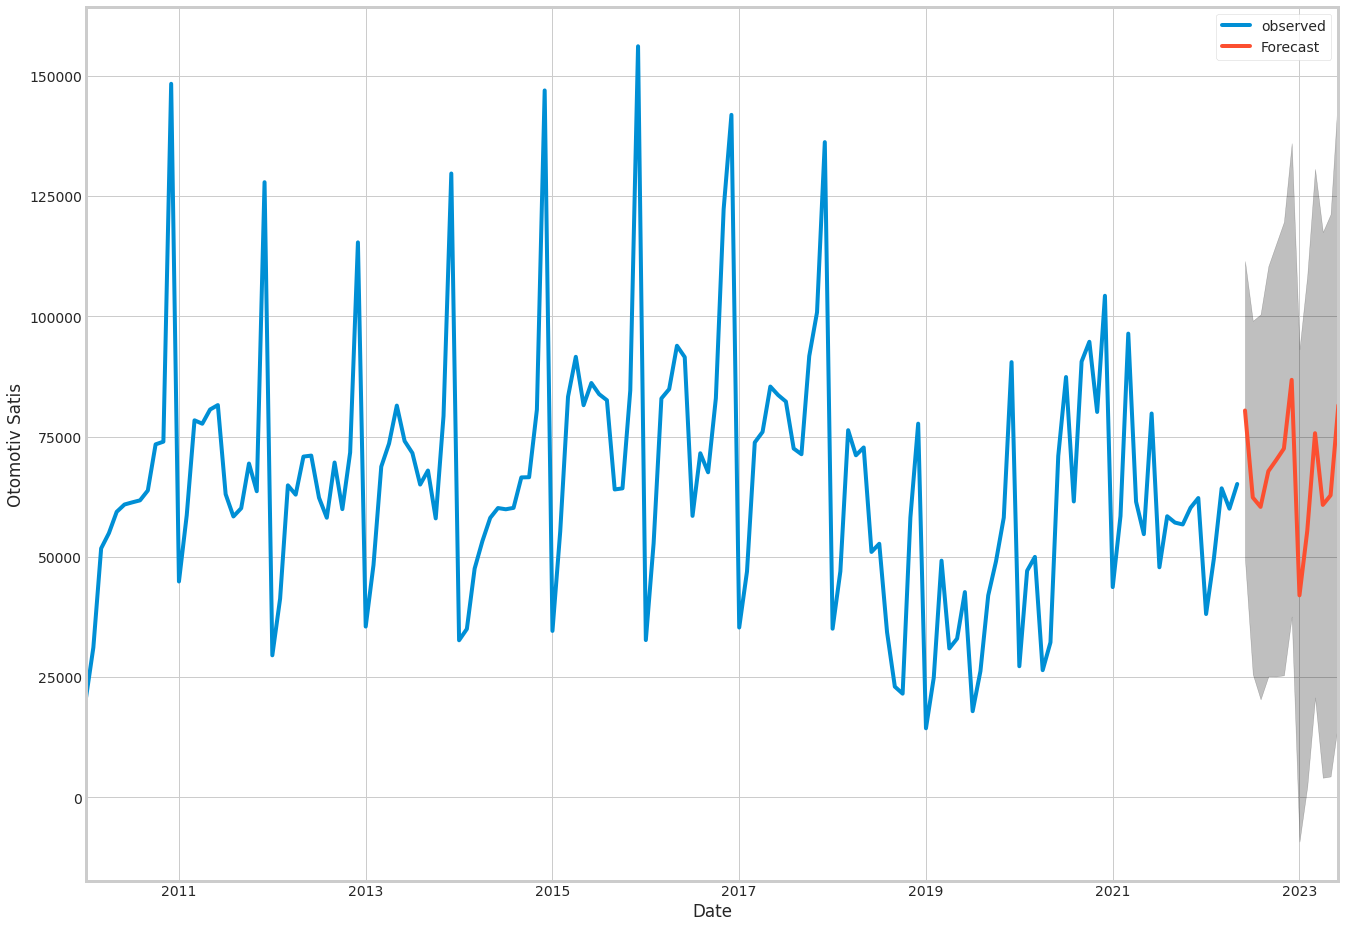

In [ ]:
ax = dtf["Otomotiv Satis"].plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Otomotiv Satis')

plt.legend()
plt.show()

In [ ]:
import pickle 

In [ ]:
results.save("Forcasting2.pkl")

In [ ]:
pickle_out = open("Forcasting1.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()